In [37]:
import pandas as pd
import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator

The trading.py file contains all of these functions. They are explicitly declared here and redundantly in trading.py, so the functionality is the same

In [38]:
def time_series_chart(**series):
    colours = cm.rainbow(
        np.linspace(0, 1,len(series )))
    df=pd.DataFrame(series)
    df.fillna(0,inplace=True)
    colors = iter(cm.rainbow(np.linspace(0, 1, len(series))))
    for k in series.keys():
        plt.plot(df.index,(df[k]-1)*100,color=next(colors),label=k)
    plt.ylabel('% growth')
    plt.legend()
    plt.show()

time_series_chart takes a variable number of series and plots them on the same chart, assuming that the value for at each index of each series represents the performance of the price of an asset or portfolio

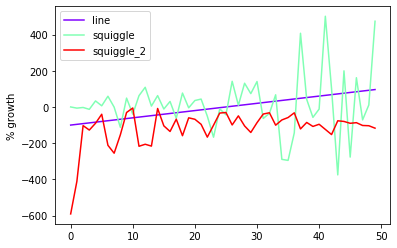

In [39]:
time_series_chart(line=pd.Series([x/25 for x in range(50)]),squiggle=pd.Series([np.random.normal(1,x/20) for x in range(50)]),squiggle_2=pd.Series([np.random.normal(0,10/(x+2)) for x in range(50)]))

In [40]:
def generate_signals(df,func): #df is the df, func is the function that takes each row as an argument, and returns 1 if buy, 0 if cash out and -1 if short
    ret=pd.Series([0 for _ in range(len(df))],index=df.index)
    for x in range(len(df)-1):
        ret.iloc[x+1]=func(df.iloc[x])
    return ret

This function takes a function that represents a strategy. The function evaluates each row of the dataframe with func, and uses that to determine how to trade (buy, sell or short). It returns a series where for each day, there is a 1,0 or -1, based on what the function decided to do based on the prior day's data.

In [41]:
def test_signals(asset,signals): #asset is time series of  %change in price, signals is trade signals,1,0,-1, returns a multiplier reflecting the portfolio's change in value since yesterday
    ret=pd.Series([1 for _ in range(len(asset))],index=asset.index)
    for x in range(len(ret)):
        ret.iloc[x]+=signals.iloc[x]*asset.iloc[x]
    return ret

given the series of trade signals from generate_signals, and a series of percentage price changes in assets this function then figures out how much that strategy would yield; if ona particular day the price went down and a -1 trade signal was made, or the price went up and a +1 price signal was made then that was a good trade, and test_signals would for that particular day have a value greater than one, representing by how much the value of the portfolio should be multiplied by

In [42]:
def eval_signals(asset,signals): #reflects change in portfolio's value since the beginning
    ret=test_signals(asset,signals)
    for x in range(1,len(ret)):
        ret.iloc[x]*=ret.iloc[x-1]
    return ret

This just returns a Series, where for a particular day, it has the cumulative change in value since the first day in the series to the particular day

In [43]:
bluh=pd.DataFrame(data={'a':[np.random.normal(0,1) for _ in range(10)], 'b':[np.random.normal(0,1) for _ in range(10)],'c':[np.random.normal(0,1) for _ in range(10)]},index=[x for x in range(10)])

this is a dataframe of random numbers that we fill the role of actual data to analyze to develop trading signals

In [44]:
def hold_strat(row):
    return 1

This is an example function for evaluating rows of a dataframe function; regardless of the inputs it decides to "buy"

In [45]:
def strat(row):
    number=np.random.normal(.5,.5)
    if sum(row)>number:
        return 1
    if sum(row)<-1 * number:
        return -1
    return 0

This is a marginally more complex function to evaluate rows of the dataframe function, notice it can only return 1,0,-1

In [46]:
prices=pd.Series(np.random.normal(0,.05) for _ in range(10))

here we make some random prices

In [49]:
trade=generate_signals(bluh,strat)
clever=eval_signals(prices,trade)
stupid=eval_signals(prices,generate_signals(bluh,hold_strat))

here we have two equivalent ways of generating series from eval_signals; either way they both return the results of a "strategy"

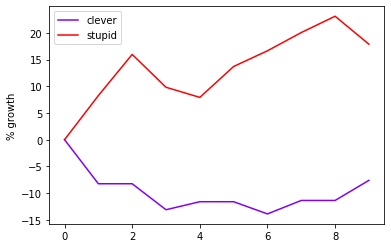

In [50]:
time_series_chart(clever=clever,stupid=stupid)